# Tabular Ordinal Regression with a Wine Quality Dataset

__author__ = "Anthony Biel"    
__github__ = "https://github.com/Excelsior7"    
__website__ = "https://anthonybiel.ai/home/"    

![Wine](./images/wine_competition_image_header.png)

## **Table of Contents**

* [1. Introduction](#1.-Introduction)
    * [1.1 Import main libraries](#1.1-Import-main-libraries)
    * [1.2 Load data](#1.2-Load-data)
    * [1.3 Meet the data](#1.3-Meet-the-data)    
        * [1.3.1 Notes on columns of the dataset](#1.3.1-Notes-on-columns-of-the-dataset-:)
        * [1.3.2 Practical reformulations of my investigation](#1.3.2-Practical-reformulations-of-my-investigation-into-the-meaning-of-columns:)
* [2. Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)
    * [2.1 Target variable: Quality](#2.1-Target-variable:-Quality)
    * [2.2 Missing values](#2.2-Missing-values)
    * [2.3 Numerical features](#2.3-Numerical-features)
        * [2.3.1 Mutual Information](#2.3.1-Mutual-Information)
        * [2.3.2 Visual support of the previous analysis](#2.3.2-Visual-support-of-the-previous-analysis)
    * [2.4 Outliers](#2.4-Outliers)
    * [2.5 Correlations](#2.5-Correlations)
* [3. Baseline before SIWLTC](#3.-Baseline-before-SIWLTC)
    * [3.1 Modeling and training details](#3.1-Modeling-and-training-details)
* [4. Data Preprocessing and Feature Engineering](#4.-Data-Preprocessing-and-Feature-Engineering)
    * [4.1 SIWLTC 1](#4.1-SIWLTC-1)
        * [4.1.1 SIWLTC 1.1](#4.1.1-SIWLTC-1.1)
        * [4.1.2 SIWLTC 1.2](#4.1.2-SIWLTC-1.2)
    * [4.2 SIWLTC 2](#4.2-SIWLTC-2)
        * [4.2.1 SIWLTC 2.1](#4.2.1-SIWLTC-2.1)
        * [4.2.2 SIWLTC 2.2](#4.2.2-SIWLTC-2.2)
    * [4.3 SIWLTC 3](#4.3-SIWLTC-3)
* [5. Modelling](#5.-Modelling)
    * [5.1 Modelling 1](#5.1-Modelling-1)
        * [5.1.1 Neural Networks, PCA](#5.1.1-Neural-Networks,-PCA)
        * [5.1.2 XGBoost](#5.1.2-XGBoost)
        * [5.1.3 Test predictions - Modelling 1](#5.1.3-Test-predictions---Modelling-1)
    * [5.2 Modelling 2](#5.2-Modelling-2)
        * [5.2.1 XGBoost](#5.2.1-XGBoost)
        * [5.2.2 Ridge Regression](#5.2.2-Ridge-Regression)
        * [5.2.3 Optimize boundaries](#5.2.3-Optimize-boundaries)
        * [5.2.4 Test predictions - Modelling 2](#5.2.4-Test-predictions---Modelling-2)
* [6. Conclusion](#6.-Conclusion)

## **1. Introduction**

Kaggle is a well-known site in the Data Science community. After a while of looking at the different features of this site from afar, I decided to get involved in a competition. Since I'm coming from a several weeks excursion from the NLP world I've been working a lot with unstructured textual data and Deep Learning architectures. 
Because of this, I wanted the competition to be focused around a tool that I think remains central to the data scientist: tabular data. For this, Kaggle and their **Kaggle's Playground Series** competitions were just perfect: well crafted competitions that last around two weeks with competitors who are often very resourceful.

So, the competition that was going on at the time I was looking for one was a competition that consisted of predicting the quality of a wine, ranging from the lowest quality 3 to the best quality 8, using some of its physicochemical information. To be precise, 11 physicochemical explanatory variables are provided, such as the acidity level or the sugar content. [Playground Series - Season 3, Episode 5 : Tabular Ordinal Regression with a Wine Quality Dataset](https://www.kaggle.com/competitions/playground-series-s3e5/overview)


The wines from which the dataset was constituted are red and white wines of the Portuguese wine [Vinho Verde](https://www.vinhoverde.pt/en/). The original source of this dataset is attributed to [Paulo Cortez](http://www3.dsi.uminho.pt/pcortez), University of Minho, Guimarães, Portugal. [UCI - Machine Learning Repository : Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/wine+quality)

For this first Kaggle competition, I obtained a Quadratic Cohen Kappa Score of 0.59235 which gives me the 9th place on 901, approximately top 0.9% in the Kaggle leaderboard.

![Ranking](./images/playground_series_season_3_ep_5.png)

### **1.1 Import main libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_style('darkgrid')

### **1.2 Load data**

In [2]:
# Load data 
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

# Separate features and target variables
X_train = train_df.drop(columns={"Id","quality"})
Y_train = train_df["quality"]

# Separate Id and features
X_test = test_df.drop(columns={"Id"})
Id_test = test_df["Id"]

### **1.3 Meet the data**

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2056 non-null   int64  
 1   fixed acidity         2056 non-null   float64
 2   volatile acidity      2056 non-null   float64
 3   citric acid           2056 non-null   float64
 4   residual sugar        2056 non-null   float64
 5   chlorides             2056 non-null   float64
 6   free sulfur dioxide   2056 non-null   float64
 7   total sulfur dioxide  2056 non-null   float64
 8   density               2056 non-null   float64
 9   pH                    2056 non-null   float64
 10  sulphates             2056 non-null   float64
 11  alcohol               2056 non-null   float64
 12  quality               2056 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 208.9 KB


##### **1.3.1 Notes on columns of the dataset :**


**Acidity**: Acidity is a characteristic determined by the total sum of acids that a sample contains. We can quantify the set of all of them in an undifferentiated way (total acidity) or in a grouped way (fixed acidity and volatile acidity). [1]

* Fixed acidity: Fixed acidity corresponds to the set of low volatility organic acids such as malic, lactic, tartaric or citric acids and is inherent to the characteristics of the grapes.[1] Practically all of the acids found in sound (good) wines are fixed acids. Most of the fixed acids originate in the grape juice, and these acids remain during fermentation and appear in the finished wine.[4]

* Volative acidity: During the course of winemaking and in the finished wines, acetic, butyric, lactic, and succinic acids can play significant roles.[2] Of all of them, the acid responsible for approximately 99% of the volatile acidity corresponds to acetic acid, so that its determination is often enough to reliably determine the total volatile acidity.[1] Most of the acids involved with wine are fixed acids with the notable exception of acetic acid, mostly found in vinegar, which is volatile and can contribute to the wine fault known as volatile acidity.[2]

* Citric acid: Citric acid is most commonly used as an acid supplement during the fermentation process to help winemakers boost the acidity of their wine especially grapes grown in warmer climates.[3] (Grapes grown in cool climates often contain too much acid, and fruit grown in warm climates generally contains to little acid [4]). Citric acid is often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes. It can be added to finished wines to increase acidity and give a “fresh” flavor. [5]

* Tasting: In wine tasting, the term “acidity” refers to the fresh, tart and sour attributes of the wine which are evaluated in relation to how well the acidity balances out the sweetness and bitter components of the wine such as tannins.[2] Fixed acids are nonvolatile and nearly odorless. Acetic acid has a distinctive odor, and it gives wine an unpleasant, hot aftertaste.[4]


**Residual sugar**: The sugar in wine is called “Residual Sugar” or RS. That means the sugar in wine is what remains after grapes have gone through the winemaking process. Grapes contain fruit sugars (fructose and glucose) and the residual sugar is what’s left after yeast has chomped on those sugars. 
Dry vs. Sweet Wine During winemaking, yeast eats up sugar and makes ethanol (alcohol) as a by-product. When the yeast is able to eat up all the sugar the result is a dry wine – higher in alcohol content and low in sugar. When the yeast is is stopped by a winemaker (often by rapid chilling) sugar remains and alcohol is lower.
This is why many sweet wines have less alcohol than dry wines! [6]


**Chlorides**: The amount of chloride in wine is influenced by both the terroir and type of grape, and the importance
of quantification lies in the fact that wine flavor is strongly impacted by this particular ion, which, in high concentration, gives
the wine an undesirable salty taste and significantly decreases its market appeal. Quantification also helps determining wine
origin and different grape varieties used in the wine, thus justifying the difference in wine regulations from country to country.[8]


**Sulfur dioxide**: The addition of sulfur dioxide is a longstanding and common practice in the winemaking industry. Sulfur dioxide preserves wine, preventing oxidation and browning. [9] 

* Free sulfur dioxide: It exists in three forms; bisulfite (HSO3-), molecular SO2, and sulfite (SO32). The equilibrium is pH dependent with the predominate form at wine pH being bisulfite. Most of the rest is molecular and very little, if any, remains in sulfite form. These forms make up what is termed as ‘free SO2’. [10]
    
* Total sulfur dioxide: When bisulfite forms binds with other molecules in wine (i.e. sugars, acids, anthocyanins, etc.), this is termed ‘bound SO2’.  Once bound, the SO2 is no longer available to protect the wine. The total SO2 is achieved by adding the free and bound. [10]

**Density**: The density of wine is slightly less than that of water, at about 0.99 g/mL. [12]


**pH**: A figure expressing the acidity or alkalinity of a solution on a logarithmic scale on which 7 is neutral, lower values are more acid and higher values more alkaline. The pH is equal to −log10 c, where c is the hydrogen ion concentration in moles per litre.
Fundamentally speaking, all wines lie on the acidic side of the pH spectrum, and most range from 2.5 to about 4.5 pH (7 is neutral). Total acidity tells us the concentration of acids present in wine, whereas the pH level tells us how intense those acids taste. For example, if you have a wine with 6 g/l total acidity and a pH of 3.2 it will taste more acidic than a wine with 4 g/l total acidity with the same pH level. [13]


**Alcohol**: The degree of alcohol in any given glass of wine is equivalent to its percentage by volume and is often referred to as "ABV" (or alcohol by volume).[14] Alcohol is naturally something of interest for a winemaker.  The alcohol in wine gives a subtle impression of sweetness on the palate. It also brings a hint of bitterness similar to that found in tonic water as well as texture.[15]


[1] https://sinatech.info/en/acetic-volatile-acidity-in-wine-cider-vinegars-and-juices/   
[2] https://en.wikipedia.org/wiki/Acids_in_wine   
[3] https://www.randoxfood.com/why-is-testing-for-citric-acid-important-in-winemaking/   
[4] https://www.homebrewit.com/pages/a-detailed-explanation-of-acids-used-in-wine-making   
[5] https://wineserver.ucdavis.edu/industry-info/enology/methods-and-techniques/common-chemical-reagents/citric-acid   
[6] https://winefolly.com/deep-dive/sugar-in-wine-chart/   
[7] https://en.wikipedia.org/wiki/Sweetness_of_wine   
[8] https://www.scielo.br/j/cta/a/HQsrPrPMNZYgRzSKtrjHyHh/?format=pdf&lang=en   
[9] https://agrifoodecon.springeropen.com/articles/10.1186/s40100-015-0038-1   
[10] https://www.extension.iastate.edu/wine/sulfur-dioxide-measurement-and-overestimation-red-wine   
[11] https://srjcstaff.santarosa.edu/~jhenderson/SO2.pdf   
[12] https://www.ariduswineco.com/blog/how-many-calories-are-in-a-glass-of-red-wine   
[13] https://winefolly.com/deep-dive/understanding-acidity-in-wine/   
[14] https://www.realsimple.com/holidays-entertaining/entertaining/food-drink/alcohol-content-wine   
[15] https://www.liquidline.se/blog/things-that-affect-the-wine-quality/   


##### **1.3.2 Practical reformulations of my investigation into the meaning of columns:**

- Acidity and residual sugar have an interaction that is closely observed by wine makers.
- 99% of the volatile acid corresponds to acetic acid and the excess of acetic acid strongly damages the quality of the wine.
- Citric acid is a fixed acid so its amount should already be included (not precised) in the "fixed acidity" variable but citric acid seems to play an important role in making a good wine so its precise amount may be of use.
- The subjective sweetness of a wine is determined by the interaction of several factors, including the amount of sugar in the wine, but also the relative levels of alcohol, acids, and tannins. [7]
- The excess of chlorides can bring a salty taste and thus little impact the quality.
- The free dioxide sulfur is the one that protects the wine and therefore protects its quality. There is a table linking the quantity of free dioxide sulfur to the pH so that the two balance each other. [11]
- Total acidity tells us the concentration of acids present in wine, whereas the pH level tells us how intense those acids taste.[13]
- Too little of alcohol may make the wine flat and dull, without any trace of lively touch. Too much alcoholic wine will cause too much of a sensation in the mouth, you will not taste anything else of the wine.[15]

## **2. Exploratory Data Analysis**

### **2.1 Target variable: Quality**

Text(0.5, 1.0, 'Distribution of the target variable: Quality')

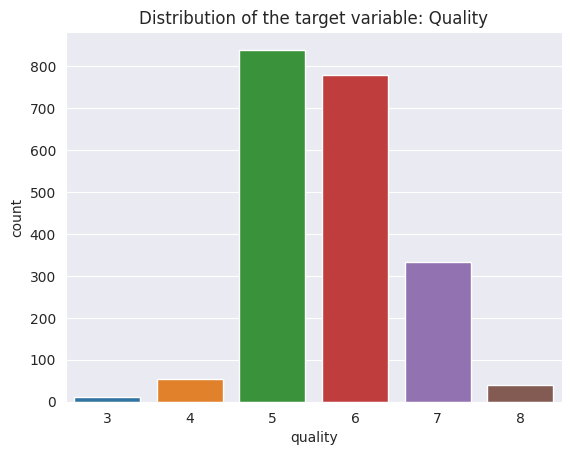

In [4]:
sns.countplot(x=Y_train)
plt.title("Distribution of the target variable: Quality")

In [5]:
Y_train.value_counts()

5    839
6    778
7    333
4     55
8     39
3     12
Name: quality, dtype: int64

**Observations :**

* The wines of quality 3 are the least represented and the wines of quality 5 are the most represented.
* We can observe a strong imbalance in the distribution of the wines in relation to their declared qualities in the data set. Quality 5 wines are 839/12≈70 times more present than quality 3 wines.
* The wines of qualities 3,4 and 8 are the wines that suffer from under-representation. Since the source of the dataset (https://archive.ics.uci.edu/ml/datasets/wine+quality) does not indicate a specific context in which one would expect to observe more than normal, wines of extreme qualities, it is intuitively understandable that low quality and high quality wines are not the most frequent. 

**Consequence :**

* The greater the imbalance, the more the ability of the algorithm to correctly identify when the quality of a wine is extreme is reduced.

**Solutions I would like to consider (SIWLTC 1):** 

* (SIWLTC 1.1) As specified in the data section of the competition (https://www.kaggle.com/competitions/playground-series-s3e5/data), it is possible to add data from the original dataset from which this dataset was synthesized.
* (SIWLTC 1.2) Over-sampling, which consists of generating samples for the minority classes.


### **2.2 Missing values**

In [6]:
X_train.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

**Observation :**

* There are no missing values

### **2.3 Numerical features**

In [105]:
from sklearn.feature_selection import mutual_info_classif

##### **2.3.1 Mutual Information**

In [7]:
Y_train_entropy = mutual_info_classif(pd.DataFrame({'Y_train':Y_train}), Y_train, )
print("Multual information upper bound: ", Y_train_entropy)

print("-"*5)

def MI(X):
    mutual_info_X_y = mutual_info_classif(X, Y_train, discrete_features=False, random_state=42)
    multual_info_X_y_df = pd.DataFrame({"MI(X;Y)":mutual_info_X_y}, index=X.columns).sort_values(by="MI(X;Y)", ascending=False)
    multual_info_X_y_df["H(Y|X)"] = Y_train_entropy - multual_info_X_y_df["MI(X;Y)"]

    return multual_info_X_y_df

MI(X_train)

Multual information upper bound:  [1.23189332]
-----


,MI(X;Y),H(Y|X)
sulphates,0.181102,1.050791
alcohol,0.137118,1.094775
total sulfur dioxide,0.034524,1.197370
fixed acidity,0.033978,1.197915
citric acid,0.033207,1.198687
density,0.023808,1.208086
volatile acidity,0.016994,1.214899
free sulfur dioxide,0.005623,1.226270
residual sugar,0.000000,1.231893
chlorides,0.000000,1.231893


**Definition:**
* H(Y) denotes the entropy of Y. (https://en.wikipedia.org/wiki/Entropy_(information_theory))
* H(Y|X) denotes the entropy Y given X. (https://en.wikipedia.org/wiki/Conditional_entropy)
* MI(X;Y) denotes the mutual information between X and Y. (https://en.wikipedia.org/wiki/Mutual_information)
* MI(Y;Y) = H(Y).

**Why MI(Y;Y) (Y_train_entropy) is a upper bound for MI(X;Y) ?**
1. MI(X;Y) = H(Y) - H(Y|X)
2. H(Y|X) >= 0
3. therefore MI(X;Y) <= H(Y) = MI(Y;Y)

**Why MI(Y;Y) - MI(X;Y) is equal to H(Y|X) ?**
1. MI(X;Y) = H(Y) - H(Y|X)
2. therefore MI(Y;Y) - MI(X;Y) = H(Y) - (H(Y) - H(Y|X)) = H(Y|X)


##### **2.3.2 Visual support of the previous analysis**

Now, it is interesting to visually verify the intuition that mutual information brings us by observing the contrast between the relationship of wine quality with the features that provide the most information, versus those that provide the least.

Text(0.5, 1.0, 'Mean residual sugar per quality category')

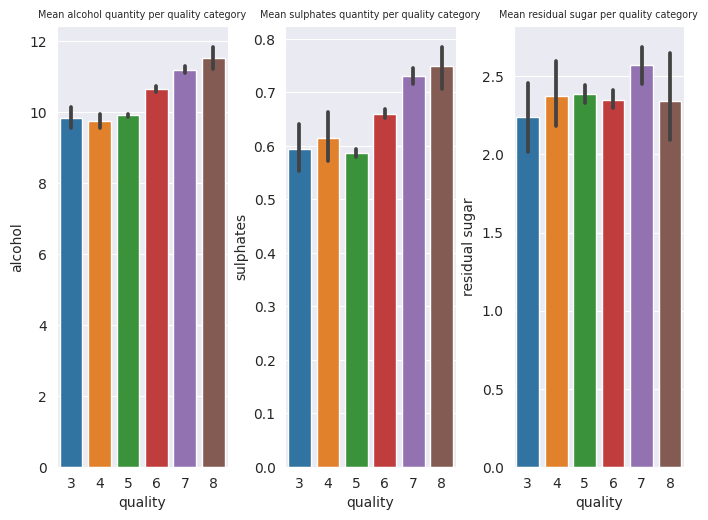

In [8]:
fig, axes = plt.subplots(1,3, figsize=(7,5))
fig.tight_layout()

sns.barplot(train_df, x="quality", y="alcohol", ax=axes[0])
axes[0].set_title("Mean alcohol quantity per quality category", fontsize="x-small")
sns.barplot(train_df, x="quality", y="sulphates", ax=axes[1])
axes[1].set_title("Mean sulphates quantity per quality category", fontsize="x-small")
sns.barplot(train_df, x="quality", y="residual sugar", ax=axes[2])
axes[2].set_title("Mean residual sugar per quality category", fontsize="x-small")

**Observations :** 

* According to the above analysis, **sulphates** and **alcohol** are the two features that provide the most information on wine quality relative to the other features. However, the entropy of Y knowing X (X represents any feature) remains close to the entropy of Y (even for sulphates and alcohol) and therefore we can conclude that **no feature taken in isolation can really determine the quality of wine.** 

* The graphs confirm the weak link between the quality of the wine and the quantity of alcohol or the quantity of sulphates. They also confirm that there is no direct link between wine quality and the amount of residual sugar.

* **This confirms the intuition that can be built by reading the various sources of information on wine that regularly emphasize that wine is a story of balance among its components.**

**Consequence :**

* If there is to be one or more features with significant predictive power, this will manifest itself through an interaction of a subset of these features. 

**Solutions I would like to consider (SIWLTC 2):** 

* (SIWLTC 2.1) Test the following interactions (my practical reformulations above 1.3.2 indicate that they may be promising):
    * Acidity, Residual Sugar
    * Acidity, alcohol
    * Residual Sugar, alcohol
    * Acidity, Residual Sugar, alcohol
    * Acidity, pH
    * Free dioxide sulfur, pH
* (SIWLTC 2.2) Test others combinations by brute force.
* Models based on decision trees are good candidates for modeling the dataset because they are known for their ability to detect interactions among features. 


### **2.4 Outliers**

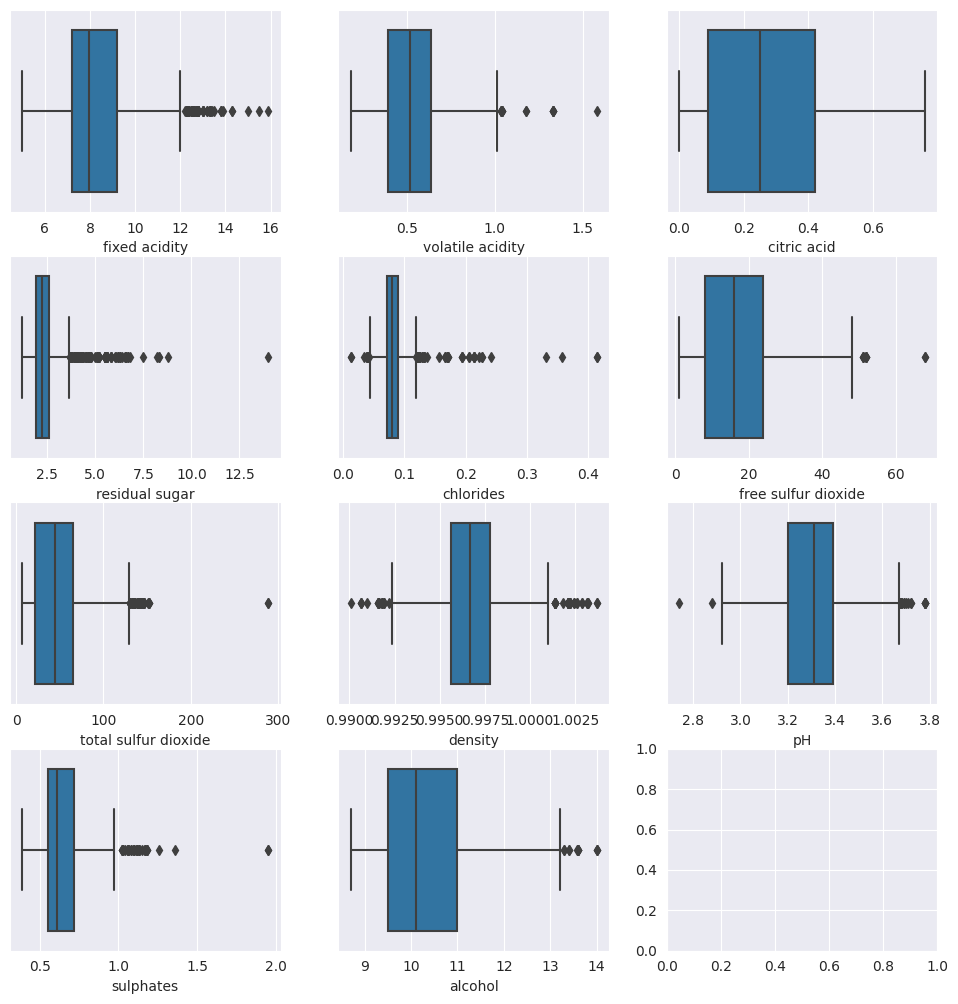

In [9]:
fig, axes = plt.subplots(4,3, figsize=(10,10))
fig.tight_layout()

count = 0;
for row in range(4):
    for col in range(3):
        if count < 11:
            sns.boxplot(X_train, x=X_train.columns[count], ax=axes[row,col])
            count+=1;

**Observations :** 

* Apart for citric acid, for each characteristic there are one or more outliers. 
* There are extreme outliers relative to the rest of the distribution for the following characteristics:
    * Volatile acidity (> 1.5)
    * Residual sugar (> 12.5)
    * Chlorides (> 0.3)
    * Free sulfur dioxide (> 60)
    * Total sulfur dioxide (> 250)
    * Sulphates (> 1.5)

**Consequence :**

* Outliers are by definition points that deviate from the distribution and can impact the quality of the modeling. Some models are more or less affected by these extreme points.

**Solutions I would like to consider (SIWLTC 3):** 

* A wine will be deleted if it has a characteristic that makes it an extreme outlier and has a quality of 5 or 6.
* The use of decision trees for modeling which are robust models for outliers and which fit perfectly with SIWLTC 2.

### **2.5 Correlations**

Text(0.5, 1.0, 'Correlation Matrix')

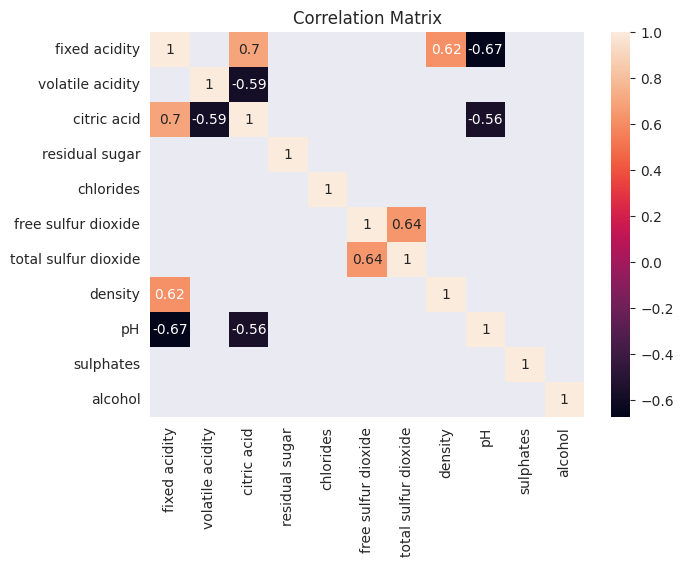

In [10]:
corr_matrix = X_train.corr()
corr_matrix = corr_matrix[abs(corr_matrix)>0.5]

plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")

**Observations :** 

* Positive pearson correlations (greater than 0.5) :
    * Fixed acidity and citric acid.
    * Fixed acidity and density.
    * Free sulfur dioxide and total sulfur dioxide
* Negative pearson correlations (less than -0.5) :
    * Fixed acidity and pH.
    * Citric acid and volatile acidity.
    * Citric acid and pH.

**Consequences :**

* Multicollinearity is a problem that generates variance in the parameters of a model. This tends to impact the interpretation. Depending on the objective of the analyst, it is therefore more or less important to tackle this problem.


**Solution I would like to consider :** 

* The focus of the competition is solely on the quality of the predictions, which eliminates the need to deal with the problem. 

## **3. Baseline before SIWLTC**

Before I try many of the solutions I want to consider (SIWLTC), I find it interesting to create a baseline on which to assess the contribution of the various possible improvements. 

I think this has **two** main benefits: **The first one is the fact of confronting one's intuition with reality** and **the second one is that one can more easily understand the levers of performance.**

### **3.1 Modeling and training details**

I will use XGBoost, a model known for its performance, which consists of an ensemble of decision trees.

I will optimize the hyperparameters of a light (n_estimators = 50) XGBClassifier model which will then be used to evaluate my different SIWLTC.

In [106]:
from xgboost import XGBClassifier
from scipy.stats import uniform, loguniform
from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import cohen_kappa_score, make_scorer

In [11]:
"""
Map target classes from [3,4,..,8] to [0,1,..,5] (XGBoost requirement)
"""

Y_train = Y_train-3

In [12]:
hparams_store = pd.HDFStore("hparams_store.h5")
kappa_scorer = make_scorer(cohen_kappa_score, weights='quadratic')

if "hparams_experimentation" not in hparams_store:
    xgb = XGBClassifier(n_estimators=50,
                        objective='multi:softmax',
                        booster='gbtree',
                        tree_method='hist')
                    
    hparams_exprm_space = {'max_depth': [2,3,4],
                        'learning_rate': loguniform(0.003,0.3),
                        'gamma': uniform(loc=0,scale=2),
                        'min_child_weight':uniform(loc=0.5,scale=2),
                        'subsample':uniform(loc=0.4,scale=0.3)
                        }

    hparams_exprm_cv = RandomizedSearchCV(xgb, hparams_exprm_space, n_iter=1000, scoring=kappa_scorer, cv=StratifiedKFold())
    hparams_exprm_cv.fit(X_train,Y_train)

    hparams_store["hparams_experimentation"] = pd.Series(hparams_exprm_cv.best_params_)

hparams_experimentation = dict(hparams_store["hparams_experimentation"])
hparams_experimentation["max_depth"] = int(hparams_experimentation["max_depth"]) 

In [13]:
hparams_experimentation

{'gamma': 1.9323623666664942,
 'learning_rate': 0.0779654835273437,
 'max_depth': 2,
 'min_child_weight': 0.9680717113033317,
 'subsample': 0.6338117614011818}

In [14]:
"""
The function that will allow me to quantify the improvement of the different modifications made (SIWLTC) to my training data set.
"""

def eval_exper_with_cv(model, X_train, Y_train):
    
    cv_scores = cross_val_score(model, X_train, Y_train, scoring=kappa_scorer, cv=StratifiedKFold(n_splits=7, shuffle=True, random_state=42))

    return {"scores.mean":cv_scores.mean(), "scores.std":cv_scores.std()}

In [15]:
""" 
Fit model and submit its predictions to Kaggle in order to evaluate the consistency 
of the local performance with the performance on the public dataset.
"""

def fit_and_submit_exper(model, X_train, Y_train, X_test):

    xgb_exper_fitted = model.fit(X_train,Y_train)

    prediction = xgb_exper_fitted.predict(X_test)+3

    prediction_df = pd.DataFrame({"Id":Id_test,"quality":prediction})

    prediction_df.to_csv("submission.csv", index=False)

In [16]:
xgb_exprm = XGBClassifier(n_estimators=50,
                           objective='multi:softmax',
                           booster='gbtree',
                           tree_method='hist',
                           **hparams_experimentation)

eval_exper_with_cv(xgb_exprm, X_train, Y_train)

{'scores.mean': 0.5070144505102823, 'scores.std': 0.03144193817262871}

In [17]:
fit_and_submit_exper(xgb_exprm, X_train, Y_train, X_test)

* Baseline Local: {'scores.mean': 0.5070144505102823, 'scores.std': 0.03144193817262871}
* Baseline Submission : 
    * Public Score: 0.51815
    * Private Score: 0.53705

## **4. Data Preprocessing and Feature Engineering**

In [18]:
X_train_exprm = X_train.copy()
Y_train_exprm = Y_train.copy()

### **4.1 SIWLTC 1**

##### **4.1.1 SIWLTC 1.1**

As specified in the data section of the competition (https://www.kaggle.com/competitions/playground-series-s3e5/data), it is possible to add data from the original dataset from which this dataset was synthesized.

In [19]:
wine_original_df = pd.read_csv("./data/wine_original_data.csv")

In [20]:
wine_original_df["quality"].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [21]:
"""
In order not to aggravate the problem that gives rise to the need for SWLTC 1, I only add data for the underrepresented classes (3,4,7,8)
"""

wine_original_df = wine_original_df.drop(columns={"Id"})
wine_original_df = wine_original_df[(wine_original_df["quality"] == 3) | 
                                    (wine_original_df["quality"] == 4) | 
                                    (wine_original_df["quality"] == 7) | 
                                    (wine_original_df["quality"] == 8)]

Y_train_exprm = pd.concat([Y_train_exprm, wine_original_df.pop("quality")-3]).reset_index(drop=True)
X_train_exprm = pd.concat([X_train_exprm, wine_original_df]).reset_index(drop=True)

In [22]:
eval_exper_with_cv(xgb_exprm, X_train_exprm, Y_train_exprm)

{'scores.mean': 0.5471686632386301, 'scores.std': 0.031968530981539615}

In [23]:
fit_and_submit_exper(xgb_exprm, X_train_exprm, Y_train_exprm, X_test)

* Local: {'scores.mean': 0.5471686632386301, 'scores.std': 0.031968530981539615}
* Submission : 
    * Public Score: 0.54547
    * Private Score: 0.55989

**The addition of new data is generally positive for the generalization capacity of a model and here we can observe a direct impact on the Quadratic Cohen Kappa Score. This validates SIWLTC 1.1.**

In [24]:
X_train = X_train_exprm
Y_train = Y_train_exprm

In [25]:
(Y_train+3).value_counts()

5    839
6    778
7    476
4     88
8     55
3     18
Name: quality, dtype: int64

##### **4.1.2 SIWLTC 1.2**

Over-sampling, which consists of generating samples for the minority classes.

**For this competition, I wanted to try to find my own oversampling strategy with four goals in mind:**
1. The first objective is I think the central objective of any oversampling strategy which is to generate new examples that remain as representative of the population as possible.
2. The second objective was to avoid overfitting (random oversampling with replacement has this problem for example).
3. The third objective was to keep the correlation between any two different features the same.
4. To have fun. :)


**So, let's consider that:**
* Xi1,Xi2,...,Xim are the m continuous features of example i.
* Cij is the correlation between feature i and feature j.
* MADj is the Median Absolute Deviation of the feature j.
* N(µ,σ) is the normal distribution with mean µ and standard deviation σ.
* f(Xij) = abs(Xij) if 0 <= abs(Xij) <= 1 else log(abs(Xij))
* oversampling_job_num represents the minimum number of examples that each class will have after the application of the algorithm.

**Now the algorithm:**
1. Let K be the examples of a class k with less than oversampling_job_num examples.
2. For each example i in K:    
⠀⠀⠀⠀2.1 Let Qi be the example that will augment Ki, so let Qi be equal to Ki.    
⠀⠀⠀⠀2.2 Let p (pivot_feature) be a random integer in the interval [0,m-1].    
⠀⠀⠀⠀2.3 For each feature j of example i:    
⠀⠀⠀⠀⠀⠀⠀⠀2.3.1 Let εij_std = min(MADj,f(Xij))     
⠀⠀⠀⠀⠀⠀⠀⠀2.3.2 Let εij = N(0,εij_std)    
⠀⠀⠀⠀⠀⠀⠀⠀2.3.3 Let Qij = Qij + abs(εij)*sign(εip)*Cjp    
⠀⠀⠀⠀2.4 Add Qi to the dataset.    
⠀⠀⠀⠀2.5 Repeat until the class k has oversampling_job_num examples.    
3. Repeat for each class with less than oversampling_job_num examples.

**Note I**   : This strategy applies for continuous features and a discrete target.    
**Note II** : Point 2.3.1 and point 2.3.2 are the points that when combined have the objective of enforcing the first and second objective. And the way to combine the information in 2.3.3 is to enforce the third objective.    

In [26]:
X_train_exprm_corr = X_train_exprm.corr()
X_train_exprm_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.314798,0.697102,0.217295,0.165876,-0.235749,-0.138387,0.624490,-0.683873,0.151790,-0.039842
volatile acidity,-0.314798,1.000000,-0.588184,-0.078677,0.043436,0.054275,0.085862,-0.044169,0.258696,-0.355076,-0.236872
citric acid,0.697102,-0.588184,1.000000,0.177184,0.162469,-0.181050,-0.084474,0.366480,-0.574431,0.286368,0.107847
residual sugar,0.217295,-0.078677,0.177184,1.000000,0.082962,-0.090327,0.005216,0.274301,-0.122029,0.026953,0.109408
chlorides,0.165876,0.043436,0.162469,0.082962,1.000000,-0.036486,-0.001313,0.260586,-0.151740,0.124112,-0.166063
free sulfur dioxide,-0.235749,0.054275,-0.181050,-0.090327,-0.036486,1.000000,0.641570,-0.070890,0.132000,-0.048114,-0.116902
total sulfur dioxide,-0.138387,0.085862,-0.084474,0.005216,-0.001313,0.641570,1.000000,0.088888,-0.012755,-0.148023,-0.293115
density,0.624490,-0.044169,0.366480,0.274301,0.260586,-0.070890,0.088888,1.000000,-0.390588,0.006917,-0.385110
pH,-0.683873,0.258696,-0.574431,-0.122029,-0.151740,0.132000,-0.012755,-0.390588,1.000000,-0.073922,0.131157
sulphates,0.151790,-0.355076,0.286368,0.026953,0.124112,-0.048114,-0.148023,0.006917,-0.073922,1.000000,0.248679


In [27]:
"""
Median Absolute Deviation
"""

MAD = X_train_exprm.apply(lambda s: abs(s - s.median())).median()
MAD

fixed acidity            0.90000
volatile acidity         0.13000
citric acid              0.17000
residual sugar           0.30000
chlorides                0.00900
free sulfur dioxide      8.00000
total sulfur dioxide    22.00000
density                  0.00114
pH                       0.10000
sulphates                0.08000
alcohol                  0.70000
dtype: float64

In [28]:
def epsij_normal_std(col):

    abs_col = abs(col)
    mask_bool = (0<=abs_col)&(abs_col<=1)
    col[mask_bool]=abs_col
    col[~mask_bool]=np.log10(abs_col)
    col[MAD[col.name] < col] = MAD[col.name]

    return col

In [29]:
def oversampling(oversampling_job_num, X, Y, correlation_matrix, random_state):

    np.random.seed(random_state)

    oversampling_job_num = oversampling_job_num

    qualities_to_oversample = list(Y.value_counts()[Y.value_counts() <= oversampling_job_num].index)

    for quality in qualities_to_oversample:
        X_q = X[Y==quality].reset_index(drop=True)
        X_q_shape = X_q.shape
        oversampling_job_delta = oversampling_job_num - X_q_shape[0]

        eij_std = X_q.copy()
        eij_std.apply(epsij_normal_std, axis=0)

        oversampling_job_finish = False
        while not oversampling_job_finish:
            eij = eij_std.applymap(lambda std: np.random.normal(0,std))

            for i in range(X_q_shape[0]):
                pivot_feature = np.random.randint(0,X_q_shape[1])

                eij_sign = np.sign(eij.iloc[i, pivot_feature])
                eij_sign = eij_sign if eij_sign != 0 else 1

                ei = (eij.iloc[i].abs() * eij_sign) * correlation_matrix.iloc[pivot_feature]

                rowi_plus_ei = X_q.iloc[i] + ei
                
                X = pd.concat([X, pd.DataFrame(rowi_plus_ei).T], axis=0)
                Y = pd.concat([Y, pd.Series(quality)])
                
                if oversampling_job_delta > 0:
                    oversampling_job_delta-=1
                else:
                    oversampling_job_finish=True
                    break

    return X.reset_index(drop=True), Y.reset_index(drop=True)

Let's start by checking that the third objective has been met

In [ ]:
X_train_exprm_400, Y_train_exprm_400 = oversampling(400, X_train_exprm, Y_train_exprm, X_train_exprm_corr, random_state=10)

In [32]:
"""
Mean of the difference between the correlation matrix before and after the oversampling strategy.
"""

(X_train_exprm_400.corr()-X_train_exprm_corr).mean()

fixed acidity          -0.012772
volatile acidity       -0.001715
citric acid            -0.000196
residual sugar         -0.008865
chlorides              -0.007066
free sulfur dioxide    -0.003035
total sulfur dioxide    0.004604
density                -0.012493
pH                     -0.003784
sulphates              -0.002851
alcohol                -0.002760
dtype: float64

In [33]:
"""
Standard Deviation of the difference between the correlation matrix before and after the oversampling strategy.
"""

(X_train_exprm_400.corr()-X_train_exprm_corr).std()

fixed acidity           0.023088
volatile acidity        0.040204
citric acid             0.022638
residual sugar          0.028792
chlorides               0.025962
free sulfur dioxide     0.026946
total sulfur dioxide    0.033444
density                 0.019526
pH                      0.025737
sulphates               0.024915
alcohol                 0.035523
dtype: float64

Since the mean of the differences and the standard deviations are close to zero, I feel like saying that the **third objective has been met**.    
Let us continue by verifying that the first and second objectives have been met by evaluating the performance of the algorithm with the augmented dataset.

**Let oversampling_job_num be equal to 400**

In [34]:
eval_exper_with_cv(xgb_exprm, X_train_exprm_400, Y_train_exprm_400)

{'scores.mean': 0.6714344016706418, 'scores.std': 0.036674746948566254}

In [35]:
fit_and_submit_exper(xgb_exprm, X_train_exprm_400, Y_train_exprm_400, X_test)

* Local: {'scores.mean': 0.6714344016706418, 'scores.std': 0.036674746948566254}
* Submission : 
    * Public Score: 0.43802
    * Private Score: 0.49966

**Conclusion**: The second objective is clearly not met when oversampling_job_num is too high.

**Let oversampling_job_num be equal to 100**

In [ ]:
X_train_exprm_100, Y_train_exprm_100 = oversampling(100, X_train_exprm, Y_train_exprm, X_train_exprm_corr, random_state=10)

In [37]:
eval_exper_with_cv(xgb_exprm, X_train_exprm_100, Y_train_exprm_100)

{'scores.mean': 0.5455529183190655, 'scores.std': 0.038066357549662824}

In [38]:
fit_and_submit_exper(xgb_exprm, X_train_exprm_100, Y_train_exprm_100, X_test)

* Local: {'scores.mean': 0.5455529183190655, 'scores.std': 0.038066357549662824}
* Submission : 
    * Public Score: 0.53856
    * Private Score: 0.56843

**Conclusion**: When oversampling_job_num is smaller we can see an improvement of the score on the private part relative to the score following the implementation of SIWLTC 1.
But nothing really conclusive, various additional experiments are I think necessary to probe the capabilities of this oversampling strategy. 

**In the end, when I saw no improvement on the public score following the implementation of this oversampling strategy, I preferred not to build on this increased dataset.**

### **4.2 SIWLTC 2**

##### **4.2.1 SIWLTC 2.1**

* Acidity, Residual Sugar
* Acidity, alcohol
* Residual Sugar, alcohol
* Acidity, Residual Sugar, alcohol
* Acidity, pH
* Free dioxide sulfur, pH

In [107]:
from itertools import permutations

In [39]:
"""
check_inter takes as input a set of features x1,x2,...,xk and try all possible interactions between these features as follows:

x1**(e1) * x2**(e2) * ... * xk**(ek), where -2<=e1,e2,...,ek<=2 and ei!=ej if i!=j

Then, I evaluate the mutual information between this new feature and the target. If the mutual information is higher than 0.18, I am notified of this interaction.
"""

def check_inter(*features):
    number_of_features = len(features)
    cwr = permutations(range(-2,3),number_of_features)

    for expons in cwr:
        inter = 1;
        for i, expon in enumerate(expons):
            if features[i].name == "citric acid" and expon <= 0:
                continue;
            else:
                inter *= features[i].pow(expon)

        mi = MI(pd.DataFrame(inter))
        
        if float(mi["MI(X;Y)"]) > 0.18:
            print(list(map(lambda x: x.name, features)))
            print([*expons, float(mi["MI(X;Y)"])])
            print('-'*5)

**Acidity, Residual Sugar**

In [ ]:
acidity1 = X_train_exprm["fixed acidity"]+X_train_exprm["volatile acidity"]
acidity1.name = "acidity1"
acidity2 = X_train_exprm["fixed acidity"]+X_train_exprm["citric acid"]
acidity2.name = "acidity2"
acidity3 = X_train_exprm["volatile acidity"]+X_train_exprm["citric acid"]
acidity3.name = "acidity3"
acidity4 = X_train_exprm["fixed acidity"]+X_train_exprm["volatile acidity"]+X_train_exprm["citric acid"]
acidity4.name = "acidity4"

acidities = [X_train_exprm["fixed acidity"],
            X_train_exprm["volatile acidity"],
            X_train_exprm["citric acid"], 
            acidity1, 
            acidity2, 
            acidity3, 
            acidity4]

for acidity in acidities:
    check_inter(acidity, X_train_exprm["residual sugar"])

No signal! 

**Acidity, Alcohol**

In [ ]:
for acidity in acidities:
    check_inter(acidity, X_train_exprm["alcohol"])

No signal! 

**Residual Sugar, Alcohol**

In [ ]:
check_inter(X_train_exprm["residual sugar"], X_train_exprm["alcohol"])

No signal!

**Acidity, Residual Sugar, alcohol**

In [ ]:
for acidity in acidities:
    check_inter(acidity, X_train_exprm["alcohol"], X_train_exprm["residual sugar"])

No signal!

**Acidity, pH**

In [ ]:
for acidity in acidities:
    check_inter(acidity, X_train_exprm["pH"])

No signal!

**Free dioxide sulfur, pH**

In [ ]:
for acidity in acidities:
    check_inter(X_train_exprm["free sulfur dioxide"], X_train_exprm["pH"])

No signal!

##### **4.2.2 SIWLTC 2.2**

Test others combinations by brute force.

In [108]:
from itertools import combinations

In [ ]:
columns_indices = range(0,X_train_exprm.shape[1])

for r in [2,3,4]:
    for comb in combinations(columns_indices,r):
        features = X_train_exprm.iloc[:,list(comb)]
        features = [features.iloc[:,i] for i in range(r)]

        check_inter(*features)

With the above method which is a brute force search, I managed to find quite a few interesting interactions from the point of view of mutual information. After filtering to keep the best and avoid redundancy in the information, I selected the following two interactions:

* density\*\*(-2) \* sulphates
* sulphates \* alcohol

In [40]:
X_train_exprm["den/sul"] = X_train_exprm["density"].pow(-2)*X_train_exprm["sulphates"]
X_train_exprm["sul*alco"] = X_train_exprm["sulphates"]*X_train_exprm["alcohol"]

In [41]:
MI(X_train_exprm[["den/sul", "sul*alco"]])

,MI(X;Y),H(Y|X)
sul*alco,0.239256,0.992638
den/sul,0.228267,1.003627


In [42]:
eval_exper_with_cv(xgb_exprm, X_train_exprm, Y_train_exprm)

{'scores.mean': 0.5458764982563779, 'scores.std': 0.03604976734630506}

In [43]:
X_test_exprm = X_test.copy()

X_test_exprm["den/sul"] = X_test_exprm["density"].pow(-2)*X_test_exprm["sulphates"]
X_test_exprm["sul*alco"] = X_test_exprm["sulphates"]*X_test_exprm["alcohol"]

fit_and_submit_exper(xgb_exprm, X_train_exprm, Y_train_exprm, X_test_exprm)

* Local: {'scores.mean': 0.5458764982563779, 'scores.std': 0.03604976734630506}
* Submission : 
    * Public Score: 0.56247
    * Private Score: 0.59235

**After discovering the private scores, I can now say that I owe my ninth place to these two features.**

In [44]:
X_train = X_train_exprm
X_test = X_test_exprm

### **4.3 SIWLTC 3**

Since I have added data following the implementation of SIWLTC 1.1, I repeat the same outlier exploration as in section 2.4 with the new dataset and apply SIWLTC 3 as proposed: A wine will be deleted if it has a characteristic that makes it an extreme outlier and has a quality of 5 or 6.

In [45]:
"""
Length of the dataset before dropping outliers.
"""

len(X_train_exprm)

2254

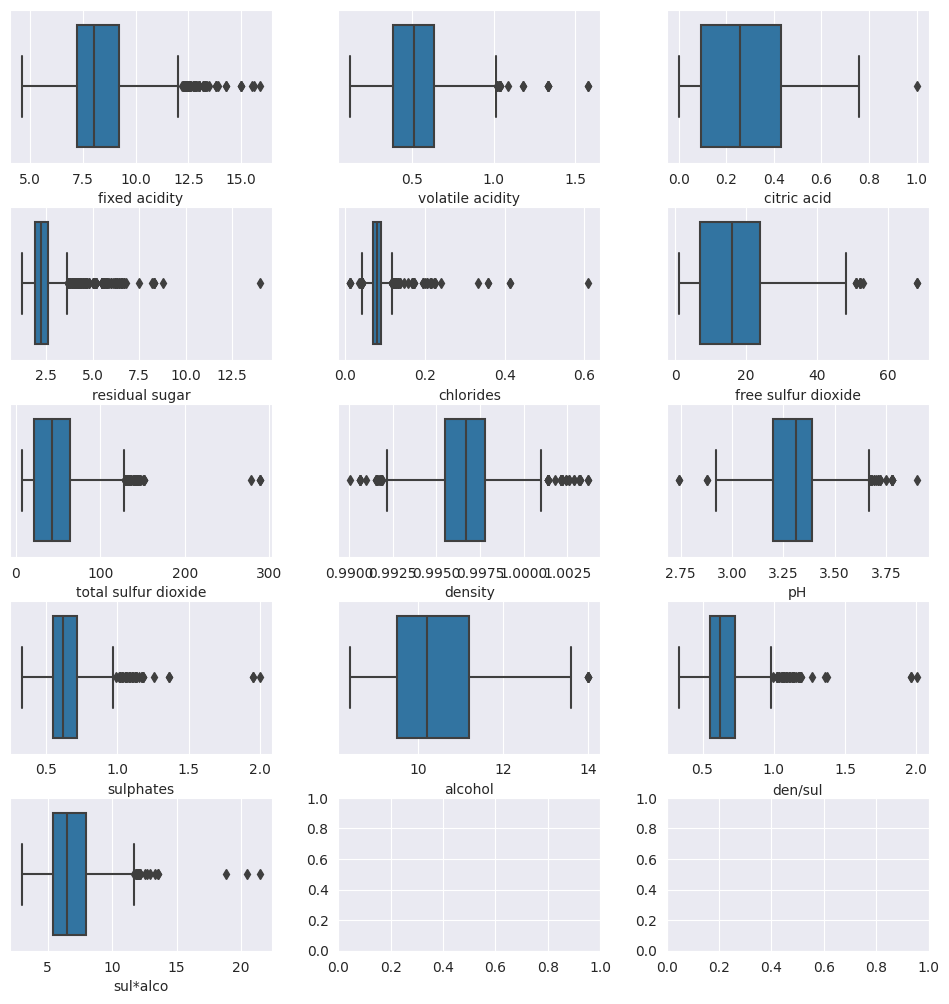

In [ ]:
fig, axes = plt.subplots(5,3, figsize=(10,10))
fig.tight_layout()

count = 0;
for row in range(5):
    for col in range(3):
        if count < 13:
            sns.boxplot(X_train, x=X_train_exprm.columns[count], ax=axes[row,col])
            count+=1;

In [46]:
def drop_outliers(X, Y, feature, threshold):
    feature_gt_threshold_mask = X[feature] > threshold
    y_is_5_or_6_mask = (Y == 5-3) | (Y == 6-3)

    indices_to_drop = X[feature_gt_threshold_mask & y_is_5_or_6_mask].index

    X.drop(indices_to_drop, axis='index', inplace=True)
    Y.drop(indices_to_drop, axis='index', inplace=True)
    X.reset_index(drop=True, inplace=True)
    Y.reset_index(drop=True, inplace=True)

In [47]:
drop_outliers(X_train_exprm, Y_train_exprm, "volatile acidity", 1.5)
drop_outliers(X_train_exprm, Y_train_exprm, "residual sugar", 12.5)
drop_outliers(X_train_exprm, Y_train_exprm, "chlorides", 0.6)
drop_outliers(X_train_exprm, Y_train_exprm, "free sulfur dioxide", 60)
drop_outliers(X_train_exprm, Y_train_exprm, "total sulfur dioxide", 200)
drop_outliers(X_train_exprm, Y_train_exprm, "sulphates", 1.5)

In [48]:
"""
Length of the dataset after dropping outliers.
"""

len(X_train_exprm)

2247

In [49]:
eval_exper_with_cv(xgb_exprm, X_train_exprm, Y_train_exprm)

{'scores.mean': 0.5434911291221891, 'scores.std': 0.03923067914002353}

In [50]:
fit_and_submit_exper(xgb_exprm, X_train_exprm, Y_train_exprm, X_test_exprm)

* Local: {'scores.mean': 0.5434911291221891, 'scores.std': 0.03923067914002353}
* Submission : 
    * Public Score: 0.56981
    * Private Score: 0.57485

Compared to previous SIWLTC 2.2 scores, the local score decreases by -0.00238 but the public score increases by 0.00734.     

**While in a real-world scenario, the advice of a domain expert would be welcome, the information at my disposal tells me that it is wise not to include these extreme points outside of the distribution because the support in these extreme areas is too low. In addition, the scores remain relatively the same.**

In [51]:
X_train = X_train_exprm
Y_train = Y_train_exprm

## **5. Modelling**

For the **modeling** part, I considered **two approaches**:

1. The **first approach** is a form of stacking which consists in training three neural networks:    
⠀⠀⠀⠀1.1 One with an incentive to correctly classify examples of a class k that is inversely proportional to the presence of class k in the dataset. (neural_net1)     
⠀⠀⠀⠀1.2 One with an incentive to correctly classify examples of a class k that is proportional to the presence of class k in the dataset. (neural_net2)     
⠀⠀⠀⠀1.3 One who must do his best to correctly classify all examples. (neural_net3)

     Then the predictions of each neural network are concatenated to the initial training dataset.     
     Then this dataset constitutes the training data set of XGBoost.

2. The **second approach** uses the stacking strategy. In this case, it consists of three elements:    
⠀⠀⠀⠀2.1 Combine predictions from neural_net3 and XGBoost (XGBoost is not trained with the training dataset augmented with neural network predictions)    
⠀⠀⠀⠀2.2 Use a Ridge regression to combine the predictions from the previous step.    
⠀⠀⠀⠀2.3 Use the function scipy.optimize.minimize to find the optimal boundaries that allow me to convert a continuous prediction from the previous step into a discrete class. (I would like to point out that I discovered the use of this technique in the book: The Kaggle Book.)

In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterSampler
import torch
import torch.nn as nn
from torch.utils.data import Sampler

### **5.1 Modelling 1**

##### **5.1.1 Neural Networks, PCA**

**Neural Net Utils**

In [53]:
"""
The neural networks will be trained with the training data set passed in the following function.

The test dataset will also be passed in this function before prediction and will be transformed 
using the statistics computed on the training dataset in order to avoid data leakage.

The transformed dataset consists of the two features of SIWLTC 2.2 standardized concatenated 
to the first four principal components from PCA (I did an analysis of variance before choosing this number four).
"""

def X_transform_input_nn(X, is_X_train, standard_scaler=None, pca=None):

    if is_X_train:
        standard_scaler = StandardScaler().fit(X)
    X_standardized = standard_scaler.transform(X)

    if is_X_train:
        pca = PCA().fit(X_standardized)
    X_pca = pca.transform(X_standardized)[:,:4]

    return np.concatenate([X_standardized[:,-2:],X_pca], axis=1), standard_scaler, pca

In [54]:
"""
The implementation of this function comes from the following github repository: 
https://github.com/ncullen93/torchsample/blob/master/torchsample/samplers.py#L22

Its objective is to ensure that the proportion of the different classes is the same in 
the global training data set and in each batch created by the Pytorch DataLoader function.

This constraint makes a lot of sense when there is an imbalance of different classes in the data set.
"""

class StratifiedSampler(Sampler):
    """Stratified Sampling
    Provides equal representation of target classes in each batch
    """
    def __init__(self, class_vector, batch_size):
        """
        Arguments
        ---------
        class_vector : torch tensor
            a vector of class labels
        batch_size : integer
            batch_size
        """
        self.n_splits = int(class_vector.size(0) / batch_size)
        self.class_vector = class_vector

    def gen_sample_array(self):
        try:
            from sklearn.model_selection import StratifiedShuffleSplit
        except:
            print('Need scikit-learn for this functionality')
        import numpy as np
        
        s = StratifiedShuffleSplit(n_splits=self.n_splits, test_size=0.5)
        X = torch.randn(self.class_vector.size(0),2).numpy()
        y = self.class_vector.numpy()
        s.get_n_splits(X, y)

        train_index, test_index = next(s.split(X, y))
        return np.hstack([train_index, test_index])

    def __iter__(self):
        return iter(self.gen_sample_array())

    def __len__(self):
        return len(self.class_vector)

In [55]:
def data_loader_utils(X, Y, batch_size):
    return torch.utils.data.DataLoader(
                    dataset=torch.utils.data.TensorDataset(X, Y),
                    batch_size=batch_size,
                    num_workers=2,
                    sampler=StratifiedSampler(Y,batch_size));

In [56]:
"""
Once my hyperparameters were defined and optimized, I used train_nn to train my model on my data set.
"""

def train_nn(model, loss, optimizer, loaded_datasets, num_epochs, X_train, Y_train):
    model.train()

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.4, patience=50, verbose=True)

    training_losses = []
    for _ in range(num_epochs):
        for X,y in loaded_datasets:
            l = loss(model(X),y)
            l.backward()
            optimizer.step()
            optimizer.zero_grad()

        training_loss = loss(model(X_train),Y_train).detach().item()
        training_losses.append(training_loss)
        scheduler.step(training_loss)

    sns.lineplot(x=np.arange(1,num_epochs+1),y=list(training_losses))
    plt.xlabel("Epoch")
    plt.ylabel("Training loss")
    plt.title("Training loss evolution over epochs")

In [57]:
def nnet(hidden_size, activation):

    if activation == 'relu':
        act = nn.ReLU()
    elif activation == 'tanh':
        act = nn.Tanh()

    return nn.Sequential(nn.Linear(6,hidden_size),
                            nn.BatchNorm1d(hidden_size),
                            act,
                            nn.Linear(hidden_size,6),
                            nn.Softmax(-1)
                        )

**Neural nets - Hyperparameters optimization**

For the optimization of the hyperparameters of my neural networks, I used the functions train_nn_score and HPO. The idea behind the development of these two functions was to recreate the RandomizedSearchCV functionality proposed by scikit-learn with StratifiedKFold as cross-validation strategy.

In [58]:
def train_nn_score(model, loss, X, y, lr, weight_decay, num_epochs, print_results):
    model.train()

    skf = StratifiedKFold()

    for train_ids, test_ids in skf.split(X,y):

        optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.4, patience=50)
    
        X_train, Y_train = X.iloc[train_ids], y.iloc[train_ids].to_numpy()
        X_test, Y_test = X.iloc[test_ids], y.iloc[test_ids].to_numpy()

        X_train, standard_scaler, pca = X_transform_input_nn(X_train,True)
        X_train = torch.tensor(X_train).to(torch.float32)
        Y_train = torch.tensor(Y_train)
        
        loaded_datasets = data_loader_utils(X_train,Y_train,256)

        cohen_kappa_scores = []
        for _ in range(num_epochs):
            for X_,y_ in loaded_datasets:
                l = loss(model(X_),y_)
                l.backward()
                optimizer.step()
                optimizer.zero_grad()

            training_loss = loss(model(X_train),Y_train).detach()
            scheduler.step(training_loss)

        X_test,_,_ = X_transform_input_nn(X_test,False,standard_scaler,pca)
        X_test = torch.tensor(X_test).to(torch.float32)
        Y_test = torch.tensor(Y_test)

        cohen_kappa_score_ = cohen_kappa_score(list(model(X_test).argmax(axis=1)),Y_test,weights="quadratic")
        cohen_kappa_scores.append(cohen_kappa_score_)

    if print_results:
        print("Cohen kappa scores : ", cohen_kappa_scores)
        print("Cohen kappa scores mean : ", np.array(cohen_kappa_scores).mean())
        print("Cohen kappa scores std : ", np.array(cohen_kappa_scores).std())

    return np.array(cohen_kappa_scores).mean()

In [59]:
def HPO(model, n_iter, loss, X, y, hparams_space_nn, num_epochs):
    
    hparams_nn_points = list(ParameterSampler(hparams_space_nn, n_iter=n_iter))

    lowest_kappa_scores_mean = -1
    best_hparams_nn_point = None

    for hparams_nn_point in hparams_nn_points:
        model = model(hparams_nn_point['hidden_size'],hparams_nn_point['activation'])
        cohen_kappa_scores_mean = train_nn_score(model, loss, X, y, hparams_nn_point['lr'], hparams_nn_point['weight_decay'], num_epochs, False)

        if cohen_kappa_scores_mean > lowest_kappa_scores_mean:
            lowest_kappa_scores_mean = cohen_kappa_scores_mean
            best_hparams_nn_point = hparams_nn_point

    return {'cohen_kappa_scores_mean':cohen_kappa_scores_mean, 'best_hparams_nn_point':best_hparams_nn_point}

In [62]:
hparams_space_nn = {
        'hidden_size': range(32,129),
        'activation': ['relu','tanh'],
        'lr': loguniform(10**(-4),10**(-1)),
        'weight_decay': loguniform(10**(-5),10**(-2)),
    }

hpo_nn_loss = nn.CrossEntropyLoss()

hpo = HPO(nnet, 1000, hpo_nn_loss, X_train, Y_train, hparams_space_nn, 250)

**Neural nets - Best hyperparameters**

In [64]:
best_hparams_nn = {'activation': 'tanh', 
                    'hidden_size': 35, 
                    'lr': 0.004698260219769486, 
                    'weight_decay': 1.0108444568274897e-05
                }

**Neural nets - Training data**

In [66]:
X_train_nn,standard_scaler,pca = X_transform_input_nn(X_train,True)
X_train_nn = torch.tensor(X_train_nn).to(torch.float32)
Y_train_nn = torch.tensor(Y_train.to_numpy())

batch_size = 256

loaded_datasets = data_loader_utils(X_train_nn,Y_train_nn,batch_size)

**Neural Net 1 - Training**

Concretely, the incentive of the neural network to correctly classify one class more than another is realized by changing the weight parameter of my loss function. **The higher the weight associated with a class, the more important it is to classify correctly the examples of this class.** Otherwise, the cost of an incorrect classification is amplified by the weight. 

In [67]:
neural_net1 = nnet(best_hparams_nn["hidden_size"], 
                   best_hparams_nn["activation"]
                )

optimizer1 = torch.optim.Adam(neural_net1.parameters(), 
                              lr=best_hparams_nn["lr"], 
                              weight_decay=best_hparams_nn["weight_decay"]
                            )

c1 = (1/Y_train.value_counts()).sort_index()
nn_weights1 = torch.tensor(list(c1/c1.min()))
ce_loss1 = nn.CrossEntropyLoss(nn_weights1)

pd.DataFrame({"quality":range(3,9),"weight":nn_weights1}).set_index("quality")

,weight
quality,
3,46.444443
4,9.500000
5,1.000000
6,1.080103
7,1.756302
8,15.200000


Epoch 00947: reducing learning rate of group 0 to 1.8793e-03.


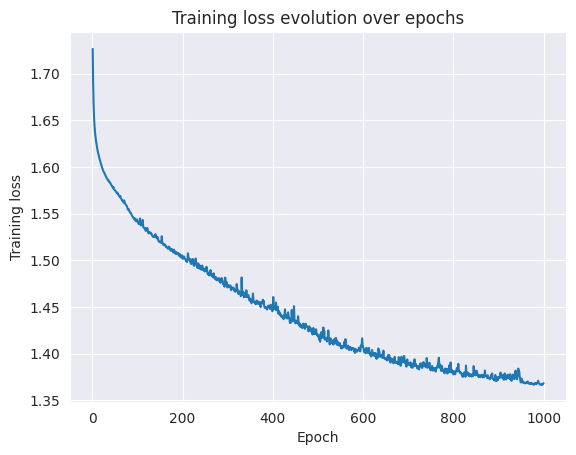

In [68]:
train_nn(neural_net1,
        ce_loss1,
        optimizer1,
        loaded_datasets,
        1000,
        X_train_nn,
        Y_train_nn
    )

In [69]:
cohen_kappa_score(list(neural_net1(X_train_nn).argmax(axis=1)),Y_train_nn,weights="quadratic")

0.5643100416649429

In [ ]:
torch.save(neural_net1.state_dict(), "nnet1.pt")

**Neural Net 2 - Training**

In [70]:
neural_net2 = nnet(best_hparams_nn["hidden_size"], 
                   best_hparams_nn["activation"]
                )

optimizer2 = torch.optim.Adam(neural_net2.parameters(), 
                              lr=best_hparams_nn["lr"], 
                              weight_decay=best_hparams_nn["weight_decay"]
                            )

c2 = Y_train.value_counts().sort_index()
nn_weights2 = torch.tensor(list(c2/c2.min()))
ce_loss2 = nn.CrossEntropyLoss(nn_weights2)

pd.DataFrame({"quality":range(3,9),"weight":nn_weights2}).set_index("quality")

,weight
quality,
3,1.000000
4,4.888889
5,46.444443
6,43.000000
7,26.444445
8,3.055556


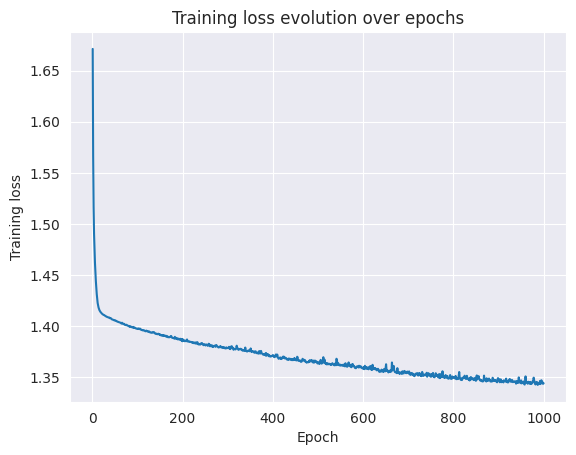

In [71]:
train_nn(neural_net2,
        ce_loss2,
        optimizer2,
        loaded_datasets,
        1000,
        X_train_nn,
        Y_train_nn
    )

In [72]:
cohen_kappa_score(list(neural_net2(X_train_nn).argmax(axis=1)),Y_train_nn,weights="quadratic")

0.5667215875755276

In [ ]:
torch.save(neural_net2.state_dict(), "nnet2.pt")

**Neural Net 3 - Training**

By default the weights of the CrossEntropyLoss function are all equal to 1.     
**This causes a uniform incentive to correctly classify each example in each class.**

In [73]:
neural_net3 = nnet(best_hparams_nn["hidden_size"], 
                   best_hparams_nn["activation"]
                )

optimizer3 = torch.optim.Adam(neural_net3.parameters(), 
                              lr=best_hparams_nn["lr"], 
                              weight_decay=best_hparams_nn["weight_decay"]
                            )

ce_loss3 = nn.CrossEntropyLoss()

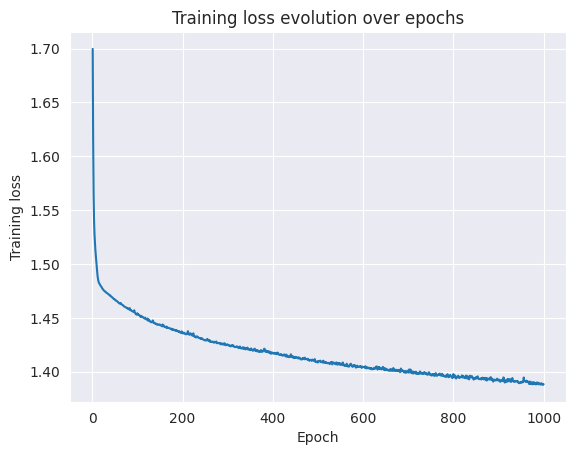

In [74]:
train_nn(neural_net3,
        ce_loss3,
        optimizer3,
        loaded_datasets,
        1000,
        X_train_nn,
        Y_train_nn
    )

In [75]:
cohen_kappa_score(list(neural_net3(X_train_nn).argmax(axis=1)),Y_train_nn,weights="quadratic")

0.6220568951566103

In [ ]:
torch.save(neural_net3.state_dict(), "nnet3.pt")

**Neural nets predictions - Train**

In [76]:
def pred(model, X_test):
    model.eval()
    return model(X_test).argmax(-1).numpy()+3

In [77]:
predictions_df = pd.DataFrame()
predictions_df["nnet1"] = pred(neural_net1, X_train_nn)-3
predictions_df["nnet2"] = pred(neural_net2, X_train_nn)-3
predictions_df["nnet3"] = pred(neural_net3, X_train_nn)-3

predictions_df.to_csv("preds_train_nn.csv", index=False)

predictions_df

,nnet1,nnet2,nnet3
0,4,3,3
1,4,3,3
2,4,3,3
3,1,2,2
4,1,3,3
...,...,...,...
2242,3,3,3
2243,4,4,4
2244,5,3,3
2245,4,3,3


##### **5.1.2 XGBoost**

**XGBoost - Hyperparameters optimization**

Here is the XGBoost training dataset in the first modeling approach.

In [78]:
nn_preds = pd.read_csv("preds_train_nn.csv")
X_train_xgboost = pd.concat([X_train,nn_preds],axis=1)

X_train_xgboost

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,den/sul,sul*alco,nnet1,nnet2,nnet3
0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.10,0.776634,9.317,4,3,3
1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.80,0.671961,8.576,4,3,3
2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.30,0.734989,8.249,4,3,3
3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.80,0.532874,5.194,1,2,2
4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.50,1.375250,12.920,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,6.6,0.56,0.14,2.4,0.064,13.0,29.0,0.99397,3.42,0.62,11.70,0.627545,7.254,3,3,3
2243,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,0.817340,9.072,4,4,4
2244,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,0.708205,7.980,5,3,3
2245,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,0.686658,7.174,4,3,3


In [ ]:
xgb = XGBClassifier(objective='multi:softmax',booster='gbtree',tree_method='exact')
                    
hparams_space = {'n_estimators':[1500,2000],
                       'max_depth': [2,3,4],
                       'learning_rate': loguniform(0.003,0.3),
                       'gamma': uniform(loc=0,scale=5),
                       'min_child_weight':uniform(loc=0.5,scale=3),
                       'subsample':uniform(loc=0.4,scale=0.3)
                      }

hparams_cv = RandomizedSearchCV(xgb, hparams_space, n_iter=1000, scoring=kappa_scorer, cv=StratifiedKFold(), n_jobs=-1)
hparams_cv.fit(X_train_xgboost,Y_train)

**XGBoost - Best hyperparameters**

In [80]:
best_hparams_xgboost = {'gamma': 2.9805082338827185, 
                        'learning_rate': 0.02055274363151991, 
                        'max_depth': 3, 
                        'min_child_weight': 1.9317414260241552, 
                        'n_estimators': 2000, 
                        'subsample': 0.6737707698746382
                    }

**XGBoost - Training**

In [81]:
xgb = XGBClassifier(objective='multi:softmax',booster='gbtree',tree_method='exact', **best_hparams_xgboost)
xgb.fit(X_train_xgboost,Y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2.9805082338827185, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.02055274363151991, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1.9317414260241552, missing=nan,
              monotone_constraints=None, n_estimators=2000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', predictor=None, ...)

In [82]:
cohen_kappa_score(xgb.predict(X_train_xgboost),Y_train,weights="quadratic")

0.7445337462246793

##### **5.1.3 Test predictions - Modelling 1**

In [83]:
X_test_nn = X_test.copy()
X_test_nn,_,_ = X_transform_input_nn(X_test_nn, False, standard_scaler, pca)
X_test_nn = torch.tensor(X_test_nn).to(torch.float32)

In [84]:
predictions_df = pd.DataFrame()
predictions_df["nnet1"] = pred(neural_net1, X_test_nn)-3
predictions_df["nnet2"] = pred(neural_net2, X_test_nn)-3
predictions_df["nnet3"] = pred(neural_net3, X_test_nn)-3

In [85]:
X_test_xgboost = pd.concat([X_test,predictions_df],axis=1)
xgboost_predictions = xgb.predict(X_test_xgboost)+3
pd.DataFrame({"Id":Id_test,"quality":xgboost_predictions}).to_csv("submission.csv", index=False)

* Local: 0.74453
* Submission : 
    * Public Score: 0.5748
    * Private Score: 0.5033

### **5.2 Modelling 2**

In [86]:
from sklearn.linear_model import Ridge
from scipy.optimize import minimize

##### **5.2.1 XGBoost**

**XGBoost - Training**

In [87]:
xgb2 = XGBClassifier(objective='multi:softmax',booster='gbtree',tree_method='exact', **best_hparams_xgboost)
xgb2.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2.9805082338827185, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.02055274363151991, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1.9317414260241552, missing=nan,
              monotone_constraints=None, n_estimators=2000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', predictor=None, ...)

Stack predictions from neural_net3 and XGBoost to form the training data set of the Ridge Regression

In [88]:
X_nn3_xgb2 = pd.DataFrame({"nn3":pred(neural_net3, X_train_nn)-3, "xg2":xgb2.predict(X_train)})
X_nn3_xgb2

,nn3,xg2
0,3,3
1,3,3
2,3,4
3,2,2
4,3,3
...,...,...
2242,3,3
2243,4,4
2244,3,3
2245,3,3


##### **5.2.2 Ridge Regression**

**Ridge Regression - Training**

In [89]:
ridge = RandomizedSearchCV(Ridge(), {'alpha':uniform(loc=0,scale=20)}, n_iter=1000) 
ridge.fit(X_nn3_xgb2,Y_train)

RandomizedSearchCV(estimator=Ridge(), n_iter=1000,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f13528bb220>})

**Ridge Regression continuous predictions - Train**

In [90]:
ridge_cont_predictions = ridge.predict(X_nn3_xgb2)
pd.concat([X_nn3_xgb2, pd.DataFrame({"ridge cont preds": ridge_cont_predictions})],axis=1)

,nn3,xg2,ridge cont preds
0,3,3,2.999683
1,3,3,2.999683
2,3,4,3.601528
3,2,2,2.130318
4,3,3,2.999683
...,...,...,...
2242,3,3,2.999683
2243,4,4,3.869047
2244,3,3,2.999683
2245,3,3,2.999683


##### **5.2.3 Optimize boundaries**

Here the cont_preds_to_dis function takes as input the continuous predictions of the Ridge Regression and what I called boundaries. **These boundaries allow to take a continuous prediction and transform it into a discrete class for the final prediction.**

**Then it is possible to optimize the choice of these boundaries in order to maximize or minimize a metric.** In my case, my goal was to find the boundaries that maximize the **Quadratic Cohen Kappa Score** on my training dataset.

To do this, I use two functions that work together:
1. The first, optimize_boundaries, takes as input a choice of boundaries, converts continuous predictions into discrete predictions using this choice and evaluates the metric of interest with these predictions.
2. The second function, scipy.optimize.minimize, takes as input optimize_boundaries, an initial boundaries choice and uses the Nelder-Mead algorithm to find the optimal boundaries choice.

In [91]:
def cont_preds_to_dis(cont_predictions, boundaries):
    b01,b12,b23,b34,b45 = boundaries
    ridge_dis_predictions = []
    for rcp in cont_predictions:
        if rcp < b01:
            ridge_dis_predictions.append(0)
        elif b01 <= rcp < b12:
            ridge_dis_predictions.append(1)
        elif b12 <= rcp < b23:
            ridge_dis_predictions.append(2)
        elif b23 <= rcp < b34:
            ridge_dis_predictions.append(3)
        elif b34 <= rcp < b45:
            ridge_dis_predictions.append(4)
        else:
            ridge_dis_predictions.append(5)

    return np.array(ridge_dis_predictions)

In [92]:
def optimize_boundaries(boundaries):
    ridge_dis_predictions = cont_preds_to_dis(ridge_cont_predictions,boundaries)   
    cohen_kappa_score_ = cohen_kappa_score(ridge_dis_predictions, Y_train, weights="quadratic")

    return -cohen_kappa_score_

In [93]:
optimization_result = minimize(optimize_boundaries,[0.5,1.5,2.5,3.5,4.5],method='Nelder-Mead')

In [94]:
best_boundaries_ridge_preds = optimization_result.x
best_boundaries_ridge_preds

array([0.514416, 1.615248, 2.52408 , 3.30792 , 4.422384])

In [99]:
print("Local Quadratic Cohen Kappa Score: ",-optimize_boundaries(best_boundaries_ridge_preds))

Local Cohen Kappa Score:  0.680024232360338


##### **5.2.4 Test predictions - Modelling 2**

In [96]:
X_nn3_xgb2_test = pd.DataFrame({"nn3":pred(neural_net3, X_test_nn)-3, "xg2":xgb2.predict(X_test)})
ridge_cont_predictions_test = ridge.predict(X_nn3_xgb2_test)
ridge_dis_predictions_test = cont_preds_to_dis(ridge_cont_predictions_test,best_boundaries_ridge_preds)+3
pd.DataFrame({"Id":Id_test,"quality":ridge_dis_predictions_test}).to_csv("submission.csv", index=False)

* Local : 0.68002
* Submission : 
    * Public Score: 0.55673
    * Private Score: 0.56625

## **6. Conclusion**

As I had imagined, I learned a lot during this competition, with a quest for knowledge ranging from wine making to the different hyperparameters of XGBoost and passing by mathematical principles. I had a lot of fun participating and so Kaggle I say: **See you soon!**